# Further Analysis and Modelling
Having engineered some features and done a little cleaning I will take a deeper look into the variables. Firstly, I will check that the data is appropriate by investigating the different features. Then, I'll peform statistical analysis on the features to help determine which are the most useful. Finally, I'll build a model.

## First Steps

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [20]:
df = pd.read_csv(r'./texts_with_features.csv')
df.head()

,Level,Text,present_simple_total,imperfect_past_total,simple_past_total,simple_future_total,conditional_total,present_subjunctive_total,imperfect_subjunctive_total,gerund_total,imperative_total,length,total_verbs,words_list,tags,present_simple_prop,imperfect_past_prop,simple_past_prop,simple_future_prop,conditional_prop,present_subjunctive_prop,imperfect_subjunctive_prop,gerund_prop,imperative_prop,is_imperfect_subjunctive,is_present_subjunctive,is_present_simple,is_future_simple,is_past_simple,is_imperfect_past,is_condtional,is_gerund,is_imperative,most_common_per,new_words_list,av_sent_length,unique_word_prop
0,1,Hazlo por tu padre o por tu madre.Aguanta por ...,16,0,0,0,1,4,0,2,0,181,23,"['Hazlo', 'por', 'tu', 'padre', 'o', 'por', 't...","[('Hazlo', 'np00000'), ('por', 'sp000'), ('tu'...",0.695652,0.00000,0.000000,0.000000,0.043478,0.173913,0.00000,0.086957,0.000000,0,1,1,0,0,0,1,1,0,0.237569,"['Hazlo', 'por', 'tu', 'padre', 'o', 'por', 't...",7.240000,0.640884
1,1,1. ¿En qué se parece un esqueleto a una comida...,15,0,2,0,1,0,0,0,2,135,20,"['1.', '¿En', 'qué', 'se', 'parece', 'un', 'es...","[('1.', 'z0'), ('¿En', 'vmm0000'), ('qué', 'pt...",0.750000,0.00000,0.100000,0.000000,0.050000,0.000000,0.00000,0.000000,0.100000,0,0,1,0,1,0,1,0,1,0.251852,"['1.', '¿En', 'qué', 'se', 'parece', 'un', 'es...",6.428571,0.577778
2,1,Hola soy Beatriz y estamos al frente de la Igl...,44,0,1,5,0,5,0,2,2,389,59,"['Hola', 'soy', 'Beatriz', 'y', 'estamos', 'al...","[('Hola', 'i'), ('soy', 'vsip000'), ('Beatriz'...",0.745763,0.00000,0.016949,0.084746,0.000000,0.084746,0.00000,0.033898,0.033898,0,1,1,1,1,0,0,1,1,0.239075,"['Hola', 'soy', 'Beatriz', 'y', 'estamos', 'al...",6.015873,0.437995
3,1,Si te conceden tres deseos en este momento ¿qu...,23,0,5,0,0,10,0,1,4,347,43,"['Si', 'te', 'conceden', 'tres', 'deseos', 'en...","[('Si', 'cs'), ('te', 'pp000000'), ('conceden'...",0.534884,0.00000,0.116279,0.000000,0.000000,0.232558,0.00000,0.023256,0.093023,0,1,1,0,1,0,0,1,1,0.259366,"['Si', 'te', 'conceden', 'tres', 'deseos', 'en...",5.073529,0.495652
4,1,¿Se las diste?. ¿Qué decías ?. ¿Se siente como...,15,1,15,3,2,3,1,0,1,249,41,"['¿Se', 'las', 'diste?.', '¿Qué', 'decías', '?...","[('¿Se', 'vmm0000'), ('las', 'da0000'), ('dist...",0.365854,0.02439,0.365854,0.073171,0.048780,0.073171,0.02439,0.000000,0.024390,1,1,1,1,1,1,1,0,1,0.293173,"['¿Se', 'las', 'diste?.', '¿Qué', 'decías', '?...",4.333333,0.429150


In [21]:
#Dropping the verb tense totals as they arn't useful for analysis
df = df.drop(['present_simple_total', 'imperfect_past_total',
       'simple_past_total', 'simple_future_total', 'conditional_total',
       'present_subjunctive_total', 'imperfect_subjunctive_total',
       'gerund_total', 'imperative_total'], 1)

In [22]:
df.describe()

,Level,length,total_verbs,present_simple_prop,imperfect_past_prop,simple_past_prop,simple_future_prop,conditional_prop,present_subjunctive_prop,imperfect_subjunctive_prop,gerund_prop,imperative_prop,is_imperfect_subjunctive,is_present_subjunctive,is_present_simple,is_future_simple,is_past_simple,is_imperfect_past,is_condtional,is_gerund,is_imperative,most_common_per,av_sent_length,unique_word_prop
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000
mean,3.714783,360.426087,40.824348,0.544056,0.100352,0.165073,0.039539,0.019807,0.057482,0.017111,0.040224,0.016355,0.360000,0.697391,0.970435,0.434783,0.782609,0.589565,0.366957,0.619130,0.363478,0.268954,15.731627,0.546218
std,1.435746,215.745691,25.199526,0.280551,0.146771,0.176761,0.087957,0.039867,0.067213,0.033029,0.045973,0.032845,0.480418,0.459787,0.169532,0.496160,0.412830,0.492341,0.482394,0.486023,0.481420,0.066197,8.013331,0.100892
min,1.000000,30.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.166667,0.101770
25%,3.000000,177.500000,21.000000,0.322581,0.000000,0.022225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.231232,9.796378,0.476113
50%,4.000000,307.000000,36.000000,0.594203,0.033333,0.100000,0.000000,0.000000,0.039216,0.000000,0.027778,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.270089,15.018182,0.537118
75%,5.000000,525.500000,55.500000,0.763397,0.146429,0.271499,0.041667,0.026316,0.083920,0.024100,0.066667,0.022989,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.313205,20.100000,0.619322
max,6.000000,979.000000,134.000000,1.000000,0.857143,0.777778,0.700000,0.415094,0.440000,0.250000,0.250000,0.333333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.510345,58.000000,0.809524


In [23]:
df.columns

Index(['Level', 'Text', 'length', 'total_verbs', 'words_list', 'tags', 'present_simple_prop', 'imperfect_past_prop', 'simple_past_prop', 'simple_future_prop', 'conditional_prop', 'present_subjunctive_prop', 'imperfect_subjunctive_prop', 'gerund_prop', 'imperative_prop', 'is_imperfect_subjunctive', 'is_present_subjunctive', 'is_present_simple', 'is_future_simple', 'is_past_simple', 'is_imperfect_past', 'is_condtional', 'is_gerund', 'is_imperative', 'most_common_per', 'new_words_list', 'av_sent_length', 'unique_word_prop'], dtype='object')

## Initial Thoughts
From the initial analysis that was done whislt feature engineering there are some specific factors I would like to explore:

- The presence of verb tenses don't match my expectations: According to curriculums the introduction of different verb tenses occurs in a specific order. Conditional Tense is supposed to be introduced in B1 and imperfect subjunctive is supposed to be introduced properly in B2. However, both of these verbs are present even in some A1 texts. I will look into the lower level texts in which these verbs occur and see what's going on there.

- Figure out the best way to express the verb data: Right now there are columns for verb tense proportions and presence of verb tenses. I would like to identify which is the better one to use for each verb tense and which should be included at all.

- Take a look at the A1 texts: Unfortunately there aren't many A1 Spanish texts available online so there are much fewer in the dataframe compared to the other levels. As such, I would like to take a closer look at the A1 texts and make sure they are consitent and no outliers will skew the limited dataset.

### Looking at A1

In [24]:
df[df.Level == 1].describe()

,Level,length,total_verbs,present_simple_prop,imperfect_past_prop,simple_past_prop,simple_future_prop,conditional_prop,present_subjunctive_prop,imperfect_subjunctive_prop,gerund_prop,imperative_prop,is_imperfect_subjunctive,is_present_subjunctive,is_present_simple,is_future_simple,is_past_simple,is_imperfect_past,is_condtional,is_gerund,is_imperative,most_common_per,av_sent_length,unique_word_prop
count,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,1.0,196.933333,28.033333,0.849289,0.009522,0.045856,0.006244,0.008664,0.037209,0.000813,0.023328,0.019076,0.033333,0.433333,1.0,0.100000,0.500000,0.133333,0.166667,0.400000,0.400000,0.314085,9.634074,0.595841
std,0.0,92.895170,16.499704,0.156956,0.039387,0.074622,0.020537,0.019860,0.061475,0.004453,0.036611,0.031900,0.182574,0.504007,0.0,0.305129,0.508548,0.345746,0.379049,0.498273,0.498273,0.048145,4.478997,0.075415
min,1.0,85.000000,11.000000,0.365854,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.201646,3.240000,0.429150
25%,1.0,127.000000,14.250000,0.799755,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.284609,6.132567,0.559678
50%,1.0,161.500000,19.500000,0.883799,0.000000,0.008333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.315025,9.099462,0.586997
75%,1.0,266.500000,40.500000,0.957265,0.000000,0.063886,0.000000,0.000000,0.061905,0.000000,0.036252,0.028469,0.000000,1.000000,1.0,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.354764,12.479167,0.653905
max,1.0,389.000000,61.000000,1.000000,0.214286,0.365854,0.084746,0.058824,0.232558,0.024390,0.142857,0.116667,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.400000,24.166667,0.727273


Looking at the means for the columns stating whether or not a verb tense is present it shows that 20% of the texts contain the conditional tense and 5% (1 text) contains the imperfect subjunctive. 

In [25]:
#Checking the A1 text with the imperfect Subjunctive
df.loc[(df.Level == 1) & (df.is_imperfect_subjunctive == 1)]

,Level,Text,length,total_verbs,words_list,tags,present_simple_prop,imperfect_past_prop,simple_past_prop,simple_future_prop,conditional_prop,present_subjunctive_prop,imperfect_subjunctive_prop,gerund_prop,imperative_prop,is_imperfect_subjunctive,is_present_subjunctive,is_present_simple,is_future_simple,is_past_simple,is_imperfect_past,is_condtional,is_gerund,is_imperative,most_common_per,new_words_list,av_sent_length,unique_word_prop
4,1,¿Se las diste?. ¿Qué decías ?. ¿Se siente como...,249,41,"['¿Se', 'las', 'diste?.', '¿Qué', 'decías', '?...","[('¿Se', 'vmm0000'), ('las', 'da0000'), ('dist...",0.365854,0.02439,0.365854,0.073171,0.04878,0.073171,0.02439,0.0,0.02439,1,1,1,1,1,1,1,0,1,0.293173,"['¿Se', 'las', 'diste?.', '¿Qué', 'decías', '?...",4.333333,0.42915


In [26]:
#This text is obviously way above A1, it will be deleted
print(df.loc[4].Text)

¿Se las diste?. ¿Qué decías ?. ¿Se siente como dar un paseo.. Ellos nos lo dieron.. Juan se lo dio.. Nosotros se los dimos.. María te va a dar el dinero.. ¿A quién diste el dinero?. María le va a dar el dinero.. ¿Me pudiera dar un asiento de ventana por favor?. He oído que...... Juan dijo que estaría esperándonos.. Sí se lo he dado.. Él dijo que iría.. Se lo doy a él.. No señor no me dijeron nada.. Se lo doy a él.. Es interesante que digas eso.. Yo se lo daré.. Me dijo que fue a verlo.. María danos el dinero.. ¡ No me digas lo que significa !. Si me dieron muchos.. ¡No escuches lo que dice!. Yo no te puedo dar el dinero hoy. Dijo que empezarías mañana.. Sí se lo he dicho.. pero te lo voy a poder dar mañana.. No no le hemos dicho nada.. Ella me dio el dinero.. ¿A quién se lo has dicho?. Yo te lo daré.. Él salió sin decir adios.. Yo te lo di.. No no podría decirle.. Yo se lo daré a ella mañana.. Elenita me dijo que te saludara.. Nosotros se lo daremos a ella mañana.. ¿Por qué le dijiste 

In [27]:
df = df.drop([4])

In [32]:
#Checking the A1's that contain conditional tense
#Apart from 0 (which is clearly above A1), these look okay.
#It makes sense for lower level texts to include the occasional word or tense above it's level, that seems to be the case here.
df.loc[(df.Level == 1) & (df.is_condtional == 1)]

,Level,Text,length,total_verbs,words_list,tags,present_simple_prop,imperfect_past_prop,simple_past_prop,simple_future_prop,conditional_prop,present_subjunctive_prop,imperfect_subjunctive_prop,gerund_prop,imperative_prop,is_imperfect_subjunctive,is_present_subjunctive,is_present_simple,is_future_simple,is_past_simple,is_imperfect_past,is_condtional,is_gerund,is_imperative,most_common_per,new_words_list,av_sent_length,unique_word_prop
0,1,Hazlo por tu padre o por tu madre.Aguanta por ...,181,23,"['Hazlo', 'por', 'tu', 'padre', 'o', 'por', 't...","[('Hazlo', 'np00000'), ('por', 'sp000'), ('tu'...",0.695652,0.0,0.000000,0.000000,0.043478,0.173913,0.0,0.086957,0.000000,0,1,1,0,0,0,1,1,0,0.237569,"['Hazlo', 'por', 'tu', 'padre', 'o', 'por', 't...",7.240000,0.640884
1,1,1. ¿En qué se parece un esqueleto a una comida...,135,20,"['1.', '¿En', 'qué', 'se', 'parece', 'un', 'es...","[('1.', 'z0'), ('¿En', 'vmm0000'), ('qué', 'pt...",0.750000,0.0,0.100000,0.000000,0.050000,0.000000,0.0,0.000000,0.100000,0,0,1,0,1,0,1,0,1,0.251852,"['1.', '¿En', 'qué', 'se', 'parece', 'un', 'es...",6.428571,0.577778
8,1,¡Buenas tardes señor!. Quiero ir al hotel San ...,243,34,"['¡Buenas', 'tardes', 'señor!.', 'Quiero', 'ir...","[('¡Buenas', 'vaic000'), ('tardes', 'nc0p000')...",0.794118,0.0,0.058824,0.029412,0.058824,0.029412,0.0,0.000000,0.029412,0,1,1,1,1,0,1,0,1,0.201646,"['¡Buenas', 'tardes', 'señor!.', 'Quiero', 'ir...",3.240000,0.559671
430,1,Consultorio de libros Hoy tengo una cita en el...,130,17,"['Consultorio', 'de', 'libros', 'Hoy', 'tengo'...","[('Consultorio', 'np00000'), ('de', 'sp000'), ...",0.882353,0.0,0.058824,0.000000,0.058824,0.000000,0.0,0.000000,0.000000,0,0,1,0,1,0,1,0,0,0.300000,"['Consultorio', 'de', 'libros', 'Hoy', 'tengo'...",13.000000,0.646154


In [31]:
print(df.loc[430].Text)

Consultorio de libros Hoy tengo una cita en el consultorio de libros. No necesito salir de casa la consulta es virtual. En este consultorio en vez de médicos hay escritores hispanos ¡y son famosos! Yo voy a pedir una cita con Rosa Montero ella va a preguntar por ejemplo: ¿Qué libros te gustan? ¿Tienes estrés? ¿Necesitas emociones en tu vida? Con estas preguntas ella va a saber mi estado de ánimo y va a recetar un libro para mí. Con este libro voy a pasar la cuarentena. A veces un libro es preferible a una medicina los libros pueden curar el alma. Además si estás contento tu cuerpo está más saludable. Para pedir una cita o tener más información sobre el consultorio de libros puedes ir a la web www.terecetounlibro.org


In [33]:
df = df.drop([0])

In [34]:
df[df.Level == 1].head()

,Level,Text,length,total_verbs,words_list,tags,present_simple_prop,imperfect_past_prop,simple_past_prop,simple_future_prop,conditional_prop,present_subjunctive_prop,imperfect_subjunctive_prop,gerund_prop,imperative_prop,is_imperfect_subjunctive,is_present_subjunctive,is_present_simple,is_future_simple,is_past_simple,is_imperfect_past,is_condtional,is_gerund,is_imperative,most_common_per,new_words_list,av_sent_length,unique_word_prop
1,1,1. ¿En qué se parece un esqueleto a una comida...,135,20,"['1.', '¿En', 'qué', 'se', 'parece', 'un', 'es...","[('1.', 'z0'), ('¿En', 'vmm0000'), ('qué', 'pt...",0.750000,0.000000,0.100000,0.000000,0.05,0.000000,0.0,0.000000,0.100000,0,0,1,0,1,0,1,0,1,0.251852,"['1.', '¿En', 'qué', 'se', 'parece', 'un', 'es...",6.428571,0.577778
2,1,Hola soy Beatriz y estamos al frente de la Igl...,389,59,"['Hola', 'soy', 'Beatriz', 'y', 'estamos', 'al...","[('Hola', 'i'), ('soy', 'vsip000'), ('Beatriz'...",0.745763,0.000000,0.016949,0.084746,0.00,0.084746,0.0,0.033898,0.033898,0,1,1,1,1,0,0,1,1,0.239075,"['Hola', 'soy', 'Beatriz', 'y', 'estamos', 'al...",6.015873,0.437995
3,1,Si te conceden tres deseos en este momento ¿qu...,347,43,"['Si', 'te', 'conceden', 'tres', 'deseos', 'en...","[('Si', 'cs'), ('te', 'pp000000'), ('conceden'...",0.534884,0.000000,0.116279,0.000000,0.00,0.232558,0.0,0.023256,0.093023,0,1,1,0,1,0,0,1,1,0.259366,"['Si', 'te', 'conceden', 'tres', 'deseos', 'en...",5.073529,0.495652
5,1,¿Dónde está Jean?. Esta es una historia para n...,363,60,"['¿Dónde', 'está', 'Jean?.', 'Esta', 'es', 'un...","[('¿Dónde', 'vmsp000'), ('está', 'vmip000'), (...",0.816667,0.016667,0.016667,0.000000,0.00,0.033333,0.0,0.000000,0.116667,0,1,1,0,1,1,0,0,1,0.355372,"['¿Dónde', 'está', 'Jean?.', 'Esta', 'es', 'un...",6.830189,0.475138
6,1,5.2 El concierto Parte II. Buenos días Magdale...,271,39,"['5.2', 'El', 'concierto', 'Parte', 'II.', 'Bu...","[('5.2', 'z0'), ('El', 'da0000'), ('concierto'...",0.846154,0.000000,0.051282,0.000000,0.00,0.025641,0.0,0.051282,0.025641,0,1,1,0,1,0,0,1,1,0.332103,"['5.2', 'El', 'concierto', 'Parte', 'II.', 'Bu...",6.452381,0.531365


In [35]:
print(df.loc[3].Text)

Si te conceden tres deseos en este momento ¿qué pides?. Oy… no se me ocurre.. ¿Nada nada? ¿Ni siquiera uno?. Que… que me haga caso…. Si te conceden tres deseos en este momento ¿qué pides?. Salud ah… felicidad y paz.. Si te conceden tres deseos en este momento ¿qué pides?. Ah… no sé… meterle gol a mi papá…. Ya muy bien ese es uno.. ¿Tú qué pides?. Ay salud… salud salud y salud.. Ehh un carro ehh… un viaje al Caribe y…. Y ganarte la Tinka (lotería peruana). Tres… ser feliz tener plata y que mis hijos tengan salud.. Irme a otro planeta.. Ser un buen futbolista cuidar a mi familia…. Ya.. Tener un cigarro ahorita para fumar.. Mantener a mi familia a mi hermano.. Así cuando sea grande ya se cuide solo.. Y ¿tú?. Ganarme la Tinka irme de viaje por todo el mundo y… no sé…. Salud para mis papás siempre.. Buena salud felicidad para mi prójimo…. Muy bien.. Paz para todos.. Que mis perros vivan para siempre.. Ok.. Que… se acabe la pobreza en el mundo y qué más… no sé me ocurre.. Algo para ti.. Ser 

After taking a look at the A1 texts individually they are harder than expected. The texts were gathered from different sources including a website were real world articles are used and then given a level. These articles are likely harder than purpose built A1 texts but were given this level as they are the easiest articles around and would be considered manageable for A1 readers. As the model is designed to evaluate texts from any source, not just textbooks, I will leave these more difficult articles in. However, I imagine the model will not peform well predicting the A1 level.

### More complex verb tenses in A2
Checking to see if the instances of more complex tenses are reasonable at an A2 level.

In [36]:
#Not unreasonably high presence of condtional but I'll check out the ones with imperfect subjunctive
df[df.Level == 2].describe()

,Level,length,total_verbs,present_simple_prop,imperfect_past_prop,simple_past_prop,simple_future_prop,conditional_prop,present_subjunctive_prop,imperfect_subjunctive_prop,gerund_prop,imperative_prop,is_imperfect_subjunctive,is_present_subjunctive,is_present_simple,is_future_simple,is_past_simple,is_imperfect_past,is_condtional,is_gerund,is_imperative,most_common_per,av_sent_length,unique_word_prop
count,103.0,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,2.0,271.631068,37.009709,0.655634,0.080921,0.146374,0.020634,0.005246,0.038233,0.007319,0.021787,0.023851,0.165049,0.553398,0.990291,0.300971,0.737864,0.514563,0.126214,0.368932,0.456311,0.282951,10.093074,0.523717
std,0.0,155.962350,24.569028,0.278628,0.134527,0.173593,0.053936,0.017327,0.060026,0.022146,0.042867,0.038028,0.373040,0.499571,0.098533,0.460923,0.441947,0.502232,0.333714,0.484875,0.500523,0.064877,6.074430,0.114316
min,2.0,58.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.077778,3.212121,0.190068
25%,2.0,157.000000,19.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.240789,6.260000,0.438194
50%,2.0,226.000000,31.000000,0.736842,0.017544,0.068493,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.287234,9.057143,0.552469
75%,2.0,324.500000,46.500000,0.880000,0.094286,0.245690,0.018706,0.000000,0.053343,0.000000,0.027402,0.041667,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.329110,11.625855,0.614305
max,2.0,865.000000,132.000000,1.000000,0.600000,0.643939,0.433333,0.120000,0.428571,0.142857,0.250000,0.272727,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.416667,51.166667,0.766667


In [62]:
#Having taken a look at a few of these it seems reasonable for the imperfect subjunctive to appear at an A2 level reading
#Used sparingly the reader can understand this tense from context
df.loc[(df.Level == 2) & (df.is_imperfect_subjunctive == 1)]

,Level,Text,length,total_verbs,words_list,tags,present_simple_prop,imperfect_past_prop,simple_past_prop,simple_future_prop,conditional_prop,present_subjunctive_prop,imperfect_subjunctive_prop,gerund_prop,imperative_prop,is_imperfect_subjunctive,is_present_subjunctive,is_present_simple,is_future_simple,is_past_simple,is_imperfect_past,is_condtional,is_gerund,is_imperative,most_common_per,new_words_list,av_sent_length,unique_word_prop
14,2,LOS TRES BARCOS. Cierto hombre rico tenía tres...,865,132,"['LOS', 'TRES', 'BARCOS.', 'Cierto', 'hombre',...","[('LOS', 'da0000'), ('TRES', 'dn0000'), ('BARC...",0.045455,0.219697,0.643939,0.000000,0.053030,0.022727,0.007576,0.007576,0.000000,1,1,1,0,1,1,1,1,0,0.345665,"['LOS', 'TRES', 'BARCOS.', 'Cierto', 'hombre',...",12.013889,0.279769
15,2,DON JUAN BOLONDRÓN. Una vez había un pobre zap...,576,71,"['DON', 'JUAN', 'BOLONDRÓN.', 'Una', 'vez', 'h...","[('DON', 'nc0s000'), ('JUAN', 'np00000'), ('BO...",0.140845,0.352113,0.422535,0.000000,0.000000,0.028169,0.014085,0.028169,0.014085,1,1,1,0,1,1,0,1,1,0.300347,"['DON', 'JUAN', 'BOLONDRÓN.', 'Una', 'vez', 'h...",12.000000,0.409722
16,2,LOS TRES OSOS. Cerca de un bosque hermoso viví...,581,82,"['LOS', 'TRES', 'OSOS.', 'Cerca', 'de', 'un', ...","[('LOS', 'da0000'), ('TRES', 'dn0000'), ('OSOS...",0.048780,0.548780,0.353659,0.000000,0.000000,0.024390,0.012195,0.000000,0.012195,1,1,1,0,1,1,0,0,1,0.304647,"['LOS', 'TRES', 'OSOS.', 'Cerca', 'de', 'un', ...",10.962264,0.320138
22,2,Hoy es día de clase. Como todas las mañanas Ma...,275,38,"['Hoy', 'es', 'día', 'de', 'clase.', 'Como', '...","[('Hoy', 'nc0s000'), ('es', 'vsip000'), ('día'...",0.815789,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.000000,1,1,1,1,1,1,1,1,0,0.283636,"['Hoy', 'es', 'día', 'de', 'clase.', 'Como', '...",10.576923,0.494545
25,2,Lucas 4 Nueva Versión Internacional (NVI). Ten...,243,36,"['Lucas', '4', 'Nueva', 'Versión', 'Internacio...","[('Lucas', 'np00000'), ('4', 'z0'), ('Nueva', ...",0.222222,0.000000,0.416667,0.111111,0.000000,0.138889,0.027778,0.027778,0.055556,1,1,1,1,1,0,0,1,1,0.197531,"['Lucas', '4', 'Nueva', 'Versión', 'Internacio...",11.571429,0.633745
26,2,Libertad una palabra enorme. 1. Libertad es un...,293,55,"['Libertad', 'una', 'palabra', 'enorme.', '1.'...","[('Libertad', 'np00000'), ('una', 'di0000'), (...",0.763636,0.018182,0.036364,0.018182,0.018182,0.090909,0.018182,0.018182,0.018182,1,1,1,1,1,1,1,1,1,0.399317,"['Libertad', 'una', 'palabra', 'enorme.', '1.'...",10.464286,0.433447
28,2,Duolingo Stories 02-02 Tres deseos. GENIO: ¡Tu...,183,24,"['Duolingo', 'Stories', '02-02', 'Tres', 'dese...","[('Duolingo', 'np00000'), ('Stories', 'np00000...",0.583333,0.041667,0.083333,0.041667,0.041667,0.041667,0.041667,0.041667,0.083333,1,1,1,1,1,1,1,1,1,0.234973,"['Duolingo', 'Stories', '02-02', 'Tres', 'dese...",5.718750,0.573770
30,2,El niño al que se le murió el amigo. [Minicuen...,296,38,"['El', 'niño', 'al', 'que', 'se', 'le', 'murió...","[('El', 'da0000'), ('niño', 'nc0s000'), ('al',...",0.157895,0.184211,0.552632,0.000000,0.000000,0.052632,0.052632,0.000000,0.000000,1,1,1,0,1,1,0,0,0,0.371622,"['El', 'niño', 'al', 'que', 'se', 'le', 'murió...",14.095238,0.472973
33,2,Hay golpes en la vida tan fuertes... ¡Yo no sé...,149,10,"['Hay', 'golpes', 'en', 'la', 'vida', 'tan', '...","[('Hay', 'vaip000'), ('golpes', 'nc0p000'), ('...",0.700000,0.000000,0.000000,0.100000,0.000000,0.000000,0.100000,0.000000,0.100000,1,0,1,1,0,0,0,0,1,0.228188,"['Hay', 'golpes', 'en', 'la', 'vida', 'tan', '...",6.208333,0.583893
41,2,Historia 8. (Esta es la historia de Luisa una ...,157,25,"['Historia', '8.', '(Esta', 'es', 'la', 'histo...","[('Historia', 'np00000'), ('8.', 'z0'), ('(Est...",0.880000,0.000000,0.040000,0.000000,0.000000,0.000000,0.080000,0.000000,0.000000,1,0,1,0,1,0,0,0,0,0.248408,"['Historia', '8.', '(Esta', 'es', 'la', 'histo...",6.240000,0.358974


### Looking at the extremes for certain variables

#### Average Sentence Length

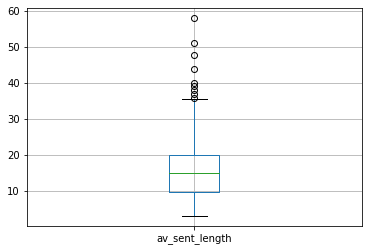

In [37]:
df.boxplot(column = 'av_sent_length')

In [38]:
#Looking at the lower end by Level
df[df.av_sent_length < 5].Level.value_counts()

2    14
3    11
4     4
1     2
Name: Level, dtype: int64

In [39]:
df.loc[(df.av_sent_length < 5) & (df.Level == 4)]

,Level,Text,length,total_verbs,words_list,tags,present_simple_prop,imperfect_past_prop,simple_past_prop,simple_future_prop,conditional_prop,present_subjunctive_prop,imperfect_subjunctive_prop,gerund_prop,imperative_prop,is_imperfect_subjunctive,is_present_subjunctive,is_present_simple,is_future_simple,is_past_simple,is_imperfect_past,is_condtional,is_gerund,is_imperative,most_common_per,new_words_list,av_sent_length,unique_word_prop
236,4,1. Una mujer estaba en un crucero. (Agnes). 2....,309,46,"['1.', 'Una', 'mujer', 'estaba', 'en', 'un', '...","[('1.', 'z0'), ('Una', 'di0000'), ('mujer', 'n...",0.043478,0.173913,0.717391,0.0,0.0,0.043478,0.021739,0.0,0.000000,1,1,1,0,1,1,0,0,0,0.139159,"['1.', 'Una', 'mujer', 'estaba', 'en', 'un', '...",3.678571,0.592233
238,4,La primavera besaba. La primavera besaba. suav...,72,4,"['La', 'primavera', 'besaba.', 'La', 'primaver...","[('La', 'da0000'), ('primavera', 'nc0s000'), (...",0.000000,0.250000,0.250000,0.0,0.0,0.250000,0.250000,0.0,0.000000,1,1,0,0,1,1,0,0,0,0.208333,"['La', 'primavera', 'besaba.', 'La', 'primaver...",4.235294,0.791667
256,4,MI VIDA LOCA Spanish for beginners. © 2008 BBC...,219,17,"['MI', 'VIDA', 'LOCA', 'Spanish', 'for', 'begi...","[('MI', 'dp0000'), ('VIDA', 'nc0s000'), ('LOCA...",0.764706,0.000000,0.117647,0.0,0.0,0.058824,0.000000,0.0,0.058824,0,1,1,0,1,0,0,0,1,0.146119,"['MI', 'VIDA', 'LOCA', 'Spanish', 'for', 'begi...",3.483333,0.602871
260,4,MI VIDA LOCA Spanish for beginners. © 2008 BBC...,153,15,"['MI', 'VIDA', 'LOCA', 'Spanish', 'for', 'begi...","[('MI', 'dp0000'), ('VIDA', 'nc0s000'), ('LOCA...",0.666667,0.000000,0.200000,0.0,0.0,0.133333,0.000000,0.0,0.000000,0,1,1,0,1,0,0,0,0,0.091503,"['MI', 'VIDA', 'LOCA', 'Spanish', 'for', 'begi...",3.536585,0.641379


In [41]:
print(df.loc[238].Text)

La primavera besaba. La primavera besaba. suavemente la arboleda. y el verde nuevo brotaba. como una verde humareda.. Las nubes iban pasando. sobre el campo juvenil.... Yo vi en las hojas temblando. las frescas lluvias de abril.. Bajo ese almendro florido. todo cargado de flor. -recordé- yo he maldecido. mi juventud sin amor.. Hoy en mitad de la vida. me he parado a meditar.... ¡Juventud nunca vivida. quién te volviera a soñar!


In [68]:
df.loc[(df.av_sent_length < 5) & (df.Level == 2)]

,Level,Text,length,total_verbs,words_list,tags,present_simple_prop,imperfect_past_prop,simple_past_prop,simple_future_prop,conditional_prop,present_subjunctive_prop,imperfect_subjunctive_prop,gerund_prop,imperative_prop,is_imperfect_subjunctive,is_present_subjunctive,is_present_simple,is_future_simple,is_past_simple,is_imperfect_past,is_condtional,is_gerund,is_imperative,most_common_per,new_words_list,av_sent_length,unique_word_prop
21,2,«No te rindas» - Poema de Mario Benedetti. Est...,186,13,"['«No', 'te', 'rindas»', '-', 'Poema', 'de', '...","[('«No', 'vmm0000'), ('te', 'pp000000'), ('rin...",0.846154,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.076923,0,1,1,0,0,0,0,0,1,0.177419,"['«No', 'te', 'rindas»', '-', 'Poema', 'de', '...",4.769231,0.575269
27,2,La cita misteriosa. SONIA: Hola mamá ya termin...,144,20,"['La', 'cita', 'misteriosa.', 'SONIA:', 'Hola'...","[('La', 'da0000'), ('cita', 'nc0s000'), ('mist...",0.800000,0.000000,0.050000,0.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,1,1,0,0,0,0,0.187500,"['La', 'cita', 'misteriosa.', 'SONIA:', 'Hola'...",4.800000,0.604167
29,2,Caminante no hay Camino. por Antonio Machado. ...,58,7,"['Caminante', 'no', 'hay', 'Camino.', 'por', '...","[('Caminante', 'aq0000'), ('no', 'rn'), ('hay'...",1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,0,0,0,0,0,0,0.258621,"['Caminante', 'no', 'hay', 'Camino.', 'por', '...",4.833333,0.586207
31,2,Verso 1. Aun antes de hablar. Ya cantabas sobr...,132,11,"['Verso', '1.', 'Aun', 'antes', 'de', 'hablar....","[('Verso', 'aq0000'), ('1.', 'z0'), ('Aun', 'r...",0.636364,0.000000,0.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0,0,1,0,1,0,0,0,1,0.242424,"['Verso', '1.', 'Aun', 'antes', 'de', 'hablar....",4.000000,0.492424
32,2,Canción del pirata. Con diez cañones por banda...,252,11,"['Canción', 'del', 'pirata.', 'Con', 'diez', '...","[('Canción', 'nc0s000'), ('del', 'sp000'), ('p...",0.636364,0.000000,0.090909,0.000000,0.000000,0.181818,0.000000,0.090909,0.000000,0,1,1,0,1,0,0,1,0,0.166667,"['Canción', 'del', 'pirata.', 'Con', 'diez', '...",3.212121,0.575472
43,2,Hola soy Beatriz. Esta vez nos encontramos en ...,551,57,"['Hola', 'soy', 'Beatriz.', 'Esta', 'vez', 'no...","[('Hola', 'i'), ('soy', 'vsip000'), ('Beatriz....",0.684211,0.017544,0.157895,0.017544,0.052632,0.035088,0.000000,0.000000,0.035088,0,1,1,1,1,1,1,0,1,0.205082,"['Hola', 'soy', 'Beatriz.', 'Esta', 'vez', 'no...",4.266129,0.431002
45,2,MI VIDA LOCA Spanish for beginners. © 2008 BBC...,212,16,"['MI', 'VIDA', 'LOCA', 'Spanish', 'for', 'begi...","[('MI', 'dp0000'), ('VIDA', 'nc0s000'), ('LOCA...",0.750000,0.000000,0.187500,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0,1,1,0,1,0,0,0,0,0.183962,"['MI', 'VIDA', 'LOCA', 'Spanish', 'for', 'begi...",4.163265,0.534314
48,2,MI VIDA LOCA Spanish for beginners. © 2008 BBC...,297,28,"['MI', 'VIDA', 'LOCA', 'Spanish', 'for', 'begi...","[('MI', 'dp0000'), ('VIDA', 'nc0s000'), ('LOCA...",0.750000,0.000000,0.035714,0.035714,0.000000,0.142857,0.000000,0.000000,0.035714,0,1,1,1,1,0,0,0,1,0.212121,"['MI', 'VIDA', 'LOCA', 'Spanish', 'for', 'begi...",4.000000,0.600694
49,2,MI VIDA LOCA Spanish for beginners. © 2008 BBC...,331,38,"['MI', 'VIDA', 'LOCA', 'Spanish', 'for', 'begi...","[('MI', 'dp0000'), ('VIDA', 'nc0s000'), ('LOCA...",0.736842,0.000000,0.131579,0.000000,0.000000,0.078947,0.000000,0.000000,0.052632,0,1,1,0,1,0,0,0,1,0.193353,"['MI', 'VIDA', 'LOCA', 'Spanish', 'for', 'begi...",4.984615,0.552469
50,2,MI VIDA LOCA Spanish for beginners. © 2008 BBC...,306,37,"['MI', 'VIDA', 'LOCA', 'Spanish', 'for', 'begi...","[('MI', 'dp0000'), ('VIDA', 'nc0s000'), ('LOCA...",0.891892,0.000000,0.054054,0.000000,0.000000,0.054054,0.000000,0.000000,0.000000,0,1,1,0,1,0,0,0,0,0.248366,"['MI', 'VIDA', 'LOCA', 'Spanish', 'for', 'begi...",4.615385,0.486667


The texts with low average sentence lengths (<5) are typically conversation scripts with frequent 2 word exchanges or item lists. All of them are appropriately levelled so I'll keep them in.

In [69]:
#At the higher end all the texts with longer sentence length are the top levels as expected with anomalies removed in the previous notebook
df[df.av_sent_length > 30].Level.value_counts()

6    23
5     4
Name: Level, dtype: int64

##### Percentage of most common spanish words in the text

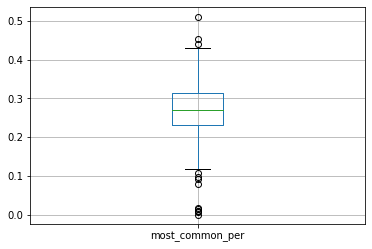

In [42]:
df.boxplot(column = 'most_common_per')

In [43]:
#A number of the lower end are non-Spanish which I'll drop.
#Other than that they look useful.
df[df.most_common_per < 0.1]

,Level,Text,length,total_verbs,words_list,tags,present_simple_prop,imperfect_past_prop,simple_past_prop,simple_future_prop,conditional_prop,present_subjunctive_prop,imperfect_subjunctive_prop,gerund_prop,imperative_prop,is_imperfect_subjunctive,is_present_subjunctive,is_present_simple,is_future_simple,is_past_simple,is_imperfect_past,is_condtional,is_gerund,is_imperative,most_common_per,new_words_list,av_sent_length,unique_word_prop
83,2,Preguntando direcciones. - ¡Hola buenos días!....,90,8,"['Preguntando', 'direcciones.', '-', '¡Hola', ...","[('Preguntando', 'vmg0000'), ('direcciones.', ...",0.625000,0.0,0.000000,0.0,0.0,0.125000,0.0,0.25,0.000000,0,1,1,0,0,0,0,1,0,0.077778,"['Preguntando', 'direcciones.', '-', '¡Hola', ...",3.913043,0.622222
150,3,MI VIDA LOCA Spanish for beginners. © 2008 BBC...,289,22,"['MI', 'VIDA', 'LOCA', 'Spanish', 'for', 'begi...","[('MI', 'dp0000'), ('VIDA', 'nc0s000'), ('LOCA...",0.818182,0.0,0.136364,0.0,0.0,0.000000,0.0,0.00,0.045455,0,0,1,0,1,0,0,0,1,0.096886,"['MI', 'VIDA', 'LOCA', 'Spanish', 'for', 'begi...",3.197674,0.483636
260,4,MI VIDA LOCA Spanish for beginners. © 2008 BBC...,153,15,"['MI', 'VIDA', 'LOCA', 'Spanish', 'for', 'begi...","[('MI', 'dp0000'), ('VIDA', 'nc0s000'), ('LOCA...",0.666667,0.0,0.200000,0.0,0.0,0.133333,0.0,0.00,0.000000,0,1,1,0,1,0,0,0,0,0.091503,"['MI', 'VIDA', 'LOCA', 'Spanish', 'for', 'begi...",3.536585,0.641379
276,5,Five Themes of Geography: STUDY GUIDE. https:/...,202,5,"['Five', 'Themes', 'of', 'Geography:', 'STUDY'...","[('Five', 'np00000'), ('Themes', 'np00000'), (...",0.000000,0.0,0.600000,0.2,0.0,0.200000,0.0,0.00,0.000000,0,1,0,1,1,0,0,0,0,0.009901,"['Five', 'Themes', 'of', 'Geography:', 'STUDY'...",7.461538,0.515464
302,5,"← Back To Documentation. Pressing ""i"" puts the...",109,6,"['←', 'Back', 'To', 'Documentation.', 'Pressin...","[('←', 'nc0s000'), ('Back', 'np00000'), ('To',...",0.500000,0.0,0.166667,0.0,0.0,0.333333,0.0,0.00,0.000000,0,1,1,0,1,0,0,0,0,0.009174,"['←', 'Back', 'To', 'Documentation.', 'Pressin...",9.083333,0.669725
379,6,The important of love in our life. When we fal...,157,11,"['The', 'important', 'of', 'love', 'in', 'our'...","[('The', 'np00000'), ('important', 'np00000'),...",0.363636,0.0,0.454545,0.0,0.0,0.000000,0.0,0.00,0.181818,0,0,1,0,1,0,0,0,1,0.000000,"['The', 'important', 'of', 'love', 'in', 'our'...",31.400000,0.515924
399,6,Last Monday there was a suspected gas explosio...,74,4,"['Last', 'Monday', 'there', 'was', 'a', 'suspe...","[('Last', 'np00000'), ('Monday', 'np00000'), (...",0.250000,0.0,0.500000,0.0,0.0,0.250000,0.0,0.00,0.000000,0,1,1,0,1,0,0,0,0,0.013514,"['Last', 'Monday', 'there', 'was', 'a', 'suspe...",14.800000,0.729730
413,6,Automatically translated Catalan text:. Aquest...,58,5,"['Automatically', 'translated', 'Catalan', 'te...","[('Automatically', 'np00000'), ('translated', ...",0.400000,0.0,0.400000,0.0,0.0,0.200000,0.0,0.00,0.000000,0,1,1,0,1,0,0,0,0,0.017241,"['Automatically', 'translated', 'Catalan', 'te...",29.000000,0.793103
425,6,Chiang Rai Thailand (CNN)A medical assessment ...,146,5,"['Chiang', 'Rai', 'Thailand', '(CNN)A', 'medic...","[('Chiang', 'np00000'), ('Rai', 'np00000'), ('...",1.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00,0.000000,0,0,1,0,0,0,0,0,0,0.006849,"['Chiang', 'Rai', 'Thailand', '(CNN)A', 'medic...",29.200000,0.698630


In [44]:
#Dropping english texts
#!!!!Make sure you get the right ones here!!!!
df = df.drop([276, 302, 379, 399, 413, 425])

In [45]:
pd.pivot_table(df, index ='Level', values='most_common_per')

,most_common_per
Level,
1,0.317564
2,0.282951
3,0.277079
4,0.282177
5,0.255035
6,0.233113


## Verb Tenses
Taking a look at the verb teses that are significant and deciding which are the best ways to represent them for modelling.

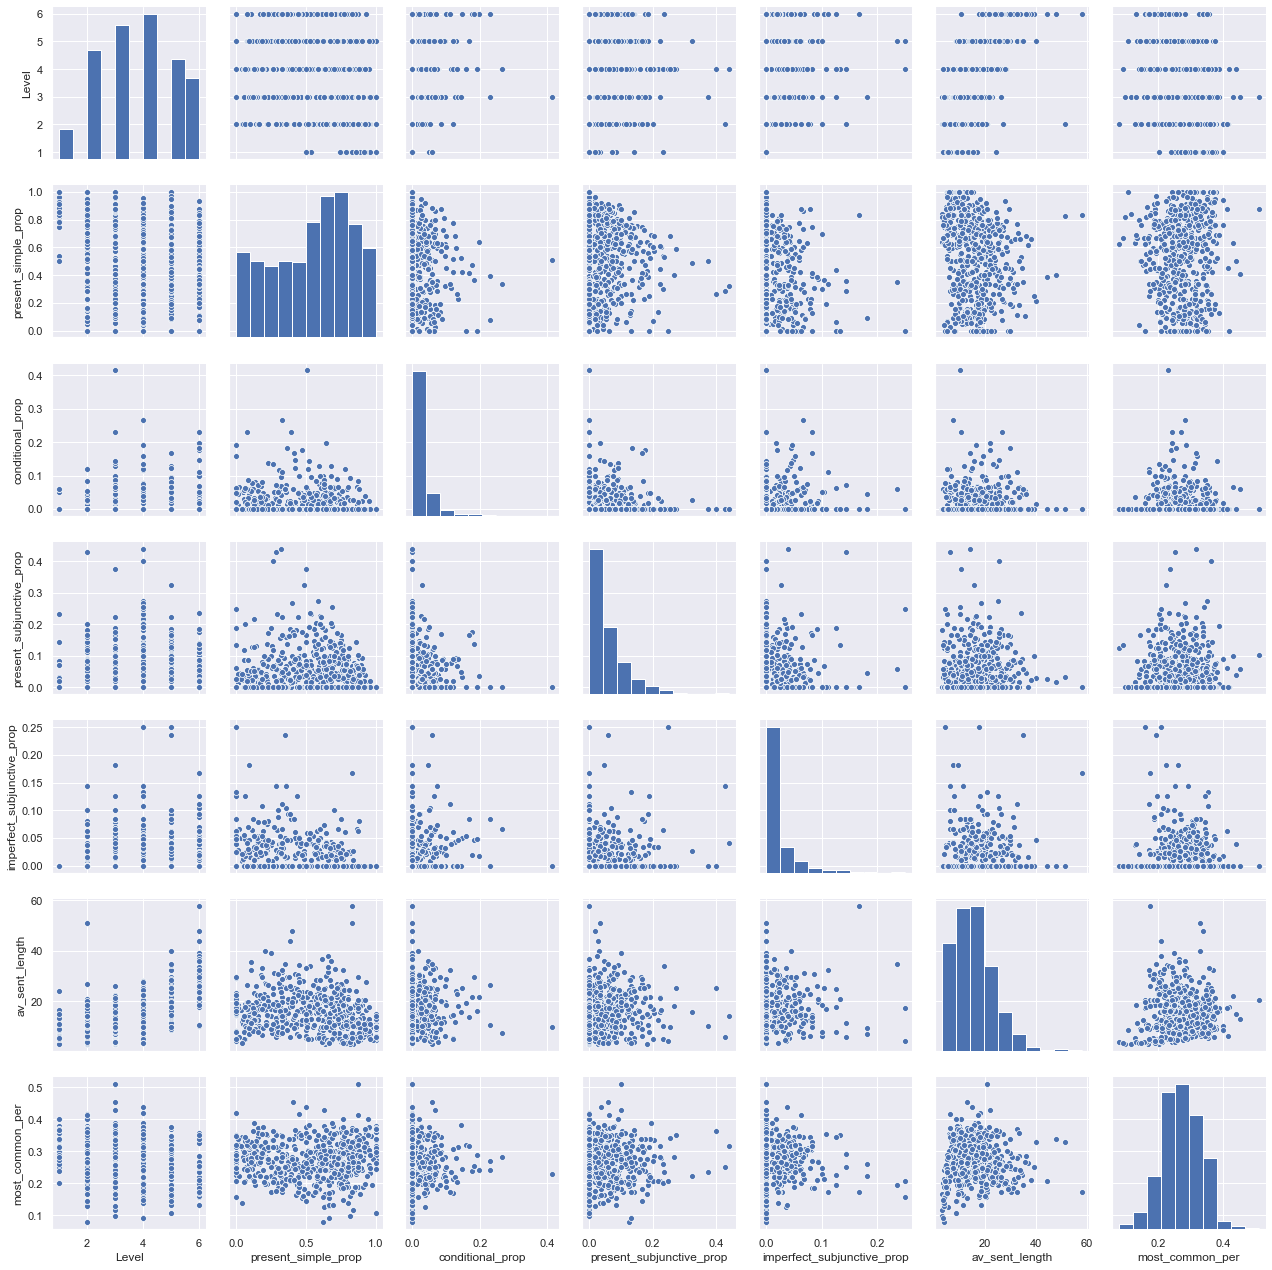

In [46]:
#Using a scatterplot to identify any trends and outliers
sns.set()
cols = ['Level', 'present_simple_prop', 'conditional_prop', 'present_subjunctive_prop', 'imperfect_subjunctive_prop', 'av_sent_length', 'most_common_per']
sns.pairplot(df[cols], height = 2.5)
plt.show();

In [48]:
df['most_common_per'].corr(df.av_sent_length)

0.02594885923066561

### Checking the outliers of less common tenses

In [49]:
#Imperative
#From looking at some of these it's clear that the tagger makes a lot of false positives with the imperative
#It would be better not to include this feature when modelling
df[df.imperative_prop > 0.25]

,Level,Text,length,total_verbs,words_list,tags,present_simple_prop,imperfect_past_prop,simple_past_prop,simple_future_prop,conditional_prop,present_subjunctive_prop,imperfect_subjunctive_prop,gerund_prop,imperative_prop,is_imperfect_subjunctive,is_present_subjunctive,is_present_simple,is_future_simple,is_past_simple,is_imperfect_past,is_condtional,is_gerund,is_imperative,most_common_per,new_words_list,av_sent_length,unique_word_prop
69,2,No hay que complicar la felicidad Marco Denevi...,320,55,"['No', 'hay', 'que', 'complicar', 'la', 'felic...","[('No', 'rn'), ('hay', 'vaip000'), ('que', 'cs...",0.636364,0.018182,0.018182,0.0,0.0,0.018182,0.036364,0.000000,0.272727,1,1,1,0,1,1,0,0,1,0.128125,"['No', 'hay', 'que', 'complicar', 'la', 'felic...",4.507042,0.425000
249,4,Ausente! La mañana en que me vaya. más lejos d...,85,6,"['Ausente!', 'La', 'mañana', 'en', 'que', 'me'...","[('Ausente!', 'vmm0000'), ('La', 'da0000'), ('...",0.000000,0.000000,0.000000,0.5,0.0,0.000000,0.000000,0.166667,0.333333,0,0,0,1,0,0,0,1,1,0.235294,"['Ausente!', 'La', 'mañana', 'en', 'que', 'me'...",5.000000,0.694118


In [50]:
#For the Gerund
#All looks good with the gerund
df[df.gerund_prop > 0.17]

,Level,Text,length,total_verbs,words_list,tags,present_simple_prop,imperfect_past_prop,simple_past_prop,simple_future_prop,conditional_prop,present_subjunctive_prop,imperfect_subjunctive_prop,gerund_prop,imperative_prop,is_imperfect_subjunctive,is_present_subjunctive,is_present_simple,is_future_simple,is_past_simple,is_imperfect_past,is_condtional,is_gerund,is_imperative,most_common_per,new_words_list,av_sent_length,unique_word_prop
83,2,Preguntando direcciones. - ¡Hola buenos días!....,90,8,"['Preguntando', 'direcciones.', '-', '¡Hola', ...","[('Preguntando', 'vmg0000'), ('direcciones.', ...",0.625000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.250000,0.000000,0,1,1,0,0,0,0,1,0,0.077778,"['Preguntando', 'direcciones.', '-', '¡Hola', ...",3.913043,0.622222
92,3,Hoy quiero presentaros un tipo nuevo de episod...,534,79,"['Hoy', 'quiero', 'presentaros', 'un', 'tipo',...","[('Hoy', 'rg'), ('quiero', 'vmip000'), ('prese...",0.670886,0.037975,0.050633,0.000000,0.025316,0.025316,0.000000,0.189873,0.000000,0,1,1,0,1,1,1,1,0,0.312734,"['Hoy', 'quiero', 'presentaros', 'un', 'tipo',...",14.052632,0.432584
167,3,HERMES Y EL LEÑADOR. Un leñador que a la orill...,224,35,"['HERMES', 'Y', 'EL', 'LEÑADOR.', 'Un', 'leñad...","[('HERMES', 'nc0p000'), ('Y', 'cc'), ('EL', 'd...",0.057143,0.200000,0.457143,0.000000,0.028571,0.085714,0.000000,0.171429,0.000000,0,1,1,0,1,1,1,1,0,0.272321,"['HERMES', 'Y', 'EL', 'LEÑADOR.', 'Un', 'leñad...",8.000000,0.500000
174,3,LA ZORRA Y EL CHIVO EN EL POZO. Cayó una zorra...,237,33,"['LA', 'ZORRA', 'Y', 'EL', 'CHIVO', 'EN', 'EL'...","[('LA', 'da0000'), ('ZORRA', 'nc0s000'), ('Y',...",0.121212,0.060606,0.424242,0.060606,0.060606,0.030303,0.030303,0.181818,0.030303,1,1,1,1,1,1,1,1,1,0.210970,"['LA', 'ZORRA', 'Y', 'EL', 'CHIVO', 'EN', 'EL'...",8.172414,0.573840
427,6,158 comentariosVer comentarios**. La ANC sigue...,228,9,"['158', 'comentariosVer', 'comentarios**.', 'L...","[('158', 'z0'), ('comentariosVer', 'np00000'),...",0.333333,0.111111,0.000000,0.111111,0.111111,0.000000,0.111111,0.222222,0.000000,1,0,1,1,0,1,1,1,0,0.171053,"['158', 'comentariosVer', 'comentarios**.', 'L...",32.571429,0.552632
441,2,Cómo escribir un correo electrónico formal Hoy...,151,17,"['Cómo', 'escribir', 'un', 'correo', 'electrón...","[('Cómo', 'pt000000'), ('escribir', 'vmn0000')...",0.705882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.176471,0.117647,0,0,1,0,0,0,0,1,1,0.271523,"['Cómo', 'escribir', 'un', 'correo', 'electrón...",16.777778,0.629139
520,4,Los novios: Alfredo desconfía ¿Os acordáis de ...,187,38,"['Los', 'novios:', 'Alfredo', 'desconfía', '¿O...","[('Los', 'da0000'), ('novios:', 'np00000'), ('...",0.131579,0.315789,0.236842,0.000000,0.026316,0.052632,0.052632,0.184211,0.000000,1,1,1,0,1,1,1,1,0,0.315508,"['Los', 'novios:', 'Alfredo', 'desconfía', '¿O...",15.583333,0.652406
552,5,Las rebajas de enero Muchos artículos habrán s...,115,12,"['Las', 'rebajas', 'de', 'enero', 'Muchos', 'a...","[('Las', 'da0000'), ('rebajas', 'nc0p000'), ('...",0.333333,0.166667,0.000000,0.083333,0.000000,0.166667,0.000000,0.250000,0.000000,0,1,1,1,0,1,0,1,0,0.182609,"['Las', 'rebajas', 'de', 'enero', 'Muchos', 'a...",28.750000,0.669565


In [51]:
#Imperfect Subjunctive
#Also anomally free
df[df.imperfect_subjunctive_prop > 0.2]

,Level,Text,length,total_verbs,words_list,tags,present_simple_prop,imperfect_past_prop,simple_past_prop,simple_future_prop,conditional_prop,present_subjunctive_prop,imperfect_subjunctive_prop,gerund_prop,imperative_prop,is_imperfect_subjunctive,is_present_subjunctive,is_present_simple,is_future_simple,is_past_simple,is_imperfect_past,is_condtional,is_gerund,is_imperative,most_common_per,new_words_list,av_sent_length,unique_word_prop
238,4,La primavera besaba. La primavera besaba. suav...,72,4,"['La', 'primavera', 'besaba.', 'La', 'primaver...","[('La', 'da0000'), ('primavera', 'nc0s000'), (...",0.000000,0.250000,0.250000,0.0,0.000000,0.250000,0.250000,0.0,0.0,1,1,0,0,1,1,0,0,0,0.208333,"['La', 'primavera', 'besaba.', 'La', 'primaver...",4.235294,0.791667
285,5,No solo la noticia la historia.. Cuando decena...,70,4,"['No', 'solo', 'la', 'noticia', 'la', 'histori...","[('No', 'rn'), ('solo', 'rg'), ('la', 'da0000'...",0.000000,0.000000,0.750000,0.0,0.000000,0.000000,0.250000,0.0,0.0,1,0,0,0,1,0,0,0,0,0.157143,"['No', 'solo', 'la', 'noticia', 'la', 'histori...",17.500000,0.757143
544,5,El español en Filipinas Las hermosas islas fil...,243,17,"['El', 'español', 'en', 'Filipinas', 'Las', 'h...","[('El', 'da0000'), ('español', 'nc0s000'), ('e...",0.352941,0.117647,0.176471,0.0,0.058824,0.058824,0.235294,0.0,0.0,1,1,1,0,1,1,1,0,0,0.193416,"['El', 'español', 'en', 'Filipinas', 'Las', 'h...",34.714286,0.609053


In [52]:
#It doesn't look like the subjunctive is overapplied but occasionally the tagger misses one or two
#However, it does get enough correct to give useful information about the tense
df[df.present_subjunctive_prop > 0.4]

,Level,Text,length,total_verbs,words_list,tags,present_simple_prop,imperfect_past_prop,simple_past_prop,simple_future_prop,conditional_prop,present_subjunctive_prop,imperfect_subjunctive_prop,gerund_prop,imperative_prop,is_imperfect_subjunctive,is_present_subjunctive,is_present_simple,is_future_simple,is_past_simple,is_imperfect_past,is_condtional,is_gerund,is_imperative,most_common_per,new_words_list,av_sent_length,unique_word_prop
55,2,Padre Nuestro que estás en el cielo. santifica...,60,7,"['Padre', 'Nuestro', 'que', 'estás', 'en', 'el...","[('Padre', 'nc0s000'), ('Nuestro', 'dp0000'), ...",0.285714,0.142857,0.0,0.00,0.0,0.428571,0.142857,0.0,0.00,1,1,1,0,0,1,0,0,0,0.250000,"['Padre', 'Nuestro', 'que', 'estás', 'en', 'el...",6.000000,0.766667
486,4,Los Novios Mis padres quieren que mi novio y y...,155,25,"['Los', 'Novios', 'Mis', 'padres', 'quieren', ...","[('Los', 'da0000'), ('Novios', 'np00000'), ('M...",0.320000,0.040000,0.0,0.08,0.0,0.440000,0.040000,0.0,0.08,1,1,1,1,0,1,0,0,1,0.316129,"['Los', 'Novios', 'Mis', 'padres', 'quieren', ...",14.090909,0.670968


In [53]:
#Also looks okay
df[df.conditional_prop > 0.4]

,Level,Text,length,total_verbs,words_list,tags,present_simple_prop,imperfect_past_prop,simple_past_prop,simple_future_prop,conditional_prop,present_subjunctive_prop,imperfect_subjunctive_prop,gerund_prop,imperative_prop,is_imperfect_subjunctive,is_present_subjunctive,is_present_simple,is_future_simple,is_past_simple,is_imperfect_past,is_condtional,is_gerund,is_imperative,most_common_per,new_words_list,av_sent_length,unique_word_prop
500,3,¿Qué harías en Bilbao? ¿Quieres viajar un fin ...,383,53,"['¿Qué', 'harías', 'en', 'Bilbao?', '¿Quieres'...","[('¿Qué', 'vmis000'), ('harías', 'nc0p000'), (...",0.509434,0.0,0.056604,0.0,0.415094,0.0,0.0,0.018868,0.0,0,0,1,0,1,0,1,1,0,0.229765,"['¿Qué', 'harías', 'en', 'Bilbao?', '¿Quieres'...",10.078947,0.535248


## Statistical Analysis

### ANOVA analysis on numerical values
Using ANOVA analysis on the verb tense proportion and other numerical features to determine which features are significant and which should be used for model building.

In [54]:
from scipy import stats

levels = pd.unique(df.Level.values)
columns = ['present_simple_prop', 'imperfect_past_prop', 'simple_past_prop', 'simple_future_prop', 'conditional_prop', 'present_subjunctive_prop', 'imperfect_subjunctive_prop', 'gerund_prop', 'imperative_prop', 'most_common_per', 'av_sent_length']
for col in columns:
    grouped_data = {level:df[col][df.Level == level] for level in levels}
    f, p = stats.f_oneway(grouped_data[1], grouped_data[2], grouped_data[3], grouped_data[4], grouped_data[5], grouped_data[6])
    print(col, 'f_statistic:', f, 'p-value:', p)
    

present_simple_prop f_statistic: 16.160403913786258 p-value: 6.687070836858867e-15
imperfect_past_prop f_statistic: 4.478534383353264 p-value: 0.0005199969433732527
simple_past_prop f_statistic: 3.7107012514934703 p-value: 0.002590864361241081
simple_future_prop f_statistic: 2.875432645873718 p-value: 0.01419018629126218
conditional_prop f_statistic: 5.418537245016221 p-value: 7.043558194783893e-05
present_subjunctive_prop f_statistic: 4.871555925360806 p-value: 0.0002262036722726437
imperfect_subjunctive_prop f_statistic: 4.789700296575717 p-value: 0.0002691481131366151
gerund_prop f_statistic: 7.211567263472026 p-value: 1.4777368235770335e-06
imperative_prop f_statistic: 2.41866812082688 p-value: 0.03483249144804973
most_common_per f_statistic: 13.875235654197422 p-value: 8.481844156726497e-13
av_sent_length f_statistic: 106.98134291351734 p-value: 3.2653664692720086e-79


The F-statistics show that the majority of numerical features have a p-value lower than 0.01 and therefore significant mean variance across levels. The least significant relationships rise from the simple past, simple future, imperfect past and imperative tense. Interestingly, the two subjunctive tests have a higher probability of being due to the null hypothosis than other tenses such as the conditional.

I'll take the most significant verb proportions and calculate the ANOVA for level to level changes to see where the largest differences occur.

In [56]:
columns = ['present_simple_prop','conditional_prop','most_common_per','av_sent_length','simple_future_prop']
for i in range(1,6):
    j = i + 1
    print('Levels ',i,' and ',j,':')
    for col in columns:
        group = {i:df[col][df.Level == i], j:df[col][df.Level == j]}
        f1, p1 =  stats.f_oneway(group[i], group[j])
        print(col, 'f_statistic:', f1, 'p-value:', p1)

Levels  1  and  2 :
present_simple_prop f_statistic: 15.907065457554774 p-value: 0.00011082704402219431
conditional_prop f_statistic: 0.03993644752138604 p-value: 0.8419195736182508
most_common_per f_statistic: 6.945075114828012 p-value: 0.009435297484068753
av_sent_length f_statistic: 0.022355928297502336 p-value: 0.8813776346140029
simple_future_prop f_statistic: 2.5584266088945573 p-value: 0.11215409236282262
Levels  2  and  3 :
present_simple_prop f_statistic: 11.233483450312779 p-value: 0.0009402940785787731
conditional_prop f_statistic: 12.238298615626272 p-value: 0.0005628052933281634
most_common_per f_statistic: 0.4608256877796798 p-value: 0.49792681896825275
av_sent_length f_statistic: 4.649853036398135 p-value: 0.032102649113289715
simple_future_prop f_statistic: 6.346486735284606 p-value: 0.012446828021658373
Levels  3  and  4 :
present_simple_prop f_statistic: 4.4167147251897365 p-value: 0.036543497881016664
conditional_prop f_statistic: 0.08647243466210275 p-value: 0.76894

From the level to level ANOVA the features show significant variance of means between levels for atleast one specific level change, with most common words and average sentence length doing most of the hard work in the upper levels. Based on these numbers the most difficult levels to distinguish between using these features will be A1 and A2 and B1 and B2.

### Chi-Squared test for catergorical variables
Peforming a Chi-Squared test on the boolean verb tense features to determine which features are significant.

In [57]:
#pivot table for catergorical variables
pd.pivot_table(df, index ='Level', values=['is_imperfect_subjunctive', 'is_present_subjunctive', 'is_present_simple', 'is_future_simple', 'is_past_simple', 'is_imperfect_past', 'is_condtional', 'is_gerund', 'is_imperative'])

,is_condtional,is_future_simple,is_gerund,is_imperative,is_imperfect_past,is_imperfect_subjunctive,is_past_simple,is_present_simple,is_present_subjunctive
Level,,,,,,,,,
1,0.107143,0.071429,0.392857,0.392857,0.107143,0.000000,0.500000,1.000000,0.392857
2,0.126214,0.300971,0.368932,0.456311,0.514563,0.165049,0.737864,0.990291,0.553398
3,0.393701,0.472441,0.590551,0.377953,0.535433,0.362205,0.771654,0.976378,0.669291
4,0.423358,0.525547,0.708029,0.350365,0.635036,0.423358,0.781022,0.941606,0.781022
5,0.463158,0.442105,0.747368,0.252632,0.736842,0.442105,0.852632,0.968421,0.757895
6,0.532468,0.532468,0.818182,0.376623,0.740260,0.558442,0.883117,0.987013,0.818182


In [58]:
columns = ['is_imperfect_subjunctive', 'is_present_subjunctive', 'is_present_simple', 'is_future_simple', 'is_past_simple', 'is_imperfect_past', 'is_condtional', 'is_gerund', 'is_imperative']
levels = pd.unique(df.Level.values)

for col in columns:
    contingency = pd.crosstab(df[col],df['Level'])
    
    stat, p, dof, expected = stats.chi2_contingency(contingency)
    print(col,' stat: ', stat, 'p-value: ', p)

is_imperfect_subjunctive  stat:  50.84079963341414 p-value:  9.323178301388096e-10
is_present_subjunctive  stat:  34.362193680286886 p-value:  2.0166127181742055e-06
is_present_simple  stat:  7.437456244564627 p-value:  0.1900852314673124
is_future_simple  stat:  30.826377535929986 p-value:  1.0136391738998783e-05
is_past_simple  stat:  21.790672277423713 p-value:  0.0005738067055032789
is_imperfect_past  stat:  47.915217156399926 p-value:  3.696316564565067e-09
is_condtional  stat:  48.86787765503587 p-value:  2.3616091375012954e-09
is_gerund  stat:  58.32302242412328 p-value:  2.6979702382963252e-11
is_imperative  stat:  9.23693415631748 p-value:  0.09997873247291586


The results from the chi-squared test suggest that all but the values for the presence of the imperative and present simple are statistically significant with p-values lower than 0.01. Frustratingly, the lowest p-value arises from the gerund but there is no reason I could think of why this would increase so dramatically with level as it's used in very simple tenses. This will need to be explored later. Now, I'll take the tenses with the lowest p-values and take a look at the chi-squared results Level to level.

In [60]:
columns = ['is_imperfect_subjunctive', 'is_present_subjunctive', 'is_condtional', 'is_gerund', 'is_imperfect_past','is_future_simple']
for i in range(1,6):
    j = i + 1
    chi_df = df.loc[(df.Level == i) | (df.Level == j)]
    print('For levels: ', i, 'and', j)
    for col in columns:
        contingency = pd.crosstab(chi_df[col],chi_df['Level'])

        stat, p, dof, expected = stats.chi2_contingency(contingency)
        print(col,' stat: ', stat, 'p-value: ', p)

For levels:  1 and 2
is_imperfect_subjunctive  stat:  3.949558853945257 p-value:  0.046883656967397304
is_present_subjunctive  stat:  1.6753318439026086 p-value:  0.1955458972147638
is_condtional  stat:  0.002721678450823143 p-value:  0.9583934694292072
is_gerund  stat:  0.0001384848279828213 p-value:  0.9906107449661757
is_imperfect_past  stat:  13.313166464401297 p-value:  0.0002635489156810967
is_future_simple  stat:  4.997547378237639 p-value:  0.025383263722522965
For levels:  2 and 3
is_imperfect_subjunctive  stat:  10.146383582756766 p-value:  0.0014458460511399425
is_present_subjunctive  stat:  2.7617994856435257 p-value:  0.09653959189722856
is_condtional  stat:  19.13773684515818 p-value:  1.2161636418843676e-05
is_gerund  stat:  10.307682836412948 p-value:  0.0013247751899688296
is_imperfect_past  stat:  0.033280450464227056 p-value:  0.8552458314460248
is_future_simple  stat:  6.2946841752721445 p-value:  0.012110059246528852
For levels:  3 and 4
is_imperfect_subjunctive  s

On a level to level basis it seems the most promising chi_squared results arise from the presence of the imperfect past tense between A1 and A2 and the presence of the gerund, imperfect subjunctive, and conditional between B1 and B2. Looking at this it does start to make sense why the gerund had such a low p-value in the overall chi-squared test, most lower level texts would likely avoid continous tenses as they would not help communication a great deal and be another source of confusion.

### Choosing Features
Based on the results from the statistical tests, the features I will use are: 'is_imperfect_subjunctive', 'is_condtional', 'is_gerund', 'is_imperfect_past','present_simple_prop', 'most_common_per', 'av_sent_length'.

These features showed the most statiscally significant difference on a level to level basis and therefore should help with making those trickier distinctions between similar levels. Looking at the results, unfortunately there aren't many features which will distinguish between A1 and A2, B1 and B2, or C1 and C2. The model will probably be much better at categorising texts into beginner, intermediate and advanced texts than it will at extracting the specific level. However, this would still be useful if there is a good result in that regard. 

In [61]:
###Dropping The features that are not going to be used
df = df.drop(['is_present_subjunctive', 'is_present_simple', 'is_future_simple', 'is_past_simple',
             'imperfect_past_prop', 'simple_past_prop', 'simple_future_prop', 'conditional_prop',
              'present_subjunctive_prop', 'imperfect_subjunctive_prop', 'gerund_prop', 'imperative_prop','Text',
             'length', 'total_verbs', 'words_list', 'tags','is_imperative','new_words_list', 'unique_word_prop'], 1)


In [62]:
df.columns

Index(['Level', 'present_simple_prop', 'is_imperfect_subjunctive', 'is_imperfect_past', 'is_condtional', 'is_gerund', 'most_common_per', 'av_sent_length'], dtype='object')

In [63]:
df.to_csv('data_for_model.csv', index=False, header=True)

## Building The Models

I will now test different predictive models using several classification algorithms to find the best one. I will use a train-test split so that the accuracy of the model will be measured against unseen texts. I will test the accuracy of these models both on the 6 specific grades (A1, A2, B1 etc.) and also as 3 different levels (Beginner, Intermediate, Advanced) where the 6 grades will be grouped by letter.

In [69]:
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [64]:
#Import data
df = pd.read_csv(r'./data_for_model.csv')

In [65]:
#One last look at the data
df.describe()

,Level,present_simple_prop,is_imperfect_subjunctive,is_imperfect_past,is_condtional,is_gerund,most_common_per,av_sent_length
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000
mean,3.703704,0.545427,0.363316,0.596120,0.368607,0.626102,0.271712,15.719871
std,1.421828,0.280325,0.481379,0.491107,0.482853,0.484264,0.060986,7.968580
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.077778,3.166667
25%,3.000000,0.322581,0.000000,0.000000,0.000000,0.000000,0.232850,9.843874
50%,4.000000,0.600000,0.000000,1.000000,0.000000,1.000000,0.271523,15.111111
75%,5.000000,0.763763,1.000000,1.000000,1.000000,1.000000,0.313623,20.008929
max,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.510345,58.000000


In [67]:
df_train.shape

(551, 8)

## As the 6 CEFR lanaguage levels

In [148]:
#Prepare the data for the models 
X = df_train.drop("Level", axis=1)
Y = df_train["Level"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

### K Nearest Neighbours

In [149]:
#Using another train_test_split on the training data to find the ideal value for number of neighbours
#This avoids optimising on the unseen data
knnX_train, knnX_test, knny_train, knny_test = train_test_split(X_train, Y_train, test_size=0.20)

scaler = StandardScaler()
scaler.fit(knnX_train)

#Scaling the features
knnX_train = scaler.transform(knnX_train)
knnX_test = scaler.transform(knnX_test)

Text(0, 0.5, 'Mean Error')

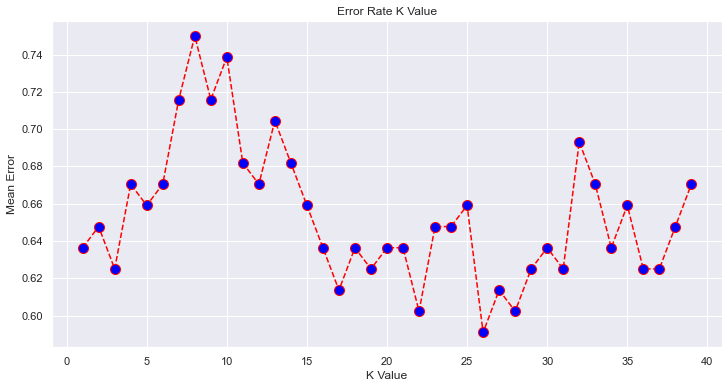

In [150]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(knnX_train, knny_train)
    pred_i = knn.predict(knnX_test)
    error.append(np.mean(pred_i != knny_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

k = 26 provides the the lowest mean error.

In [151]:
#Using K = 26
knn = KNeighborsClassifier(n_neighbors = 35)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
test_acc = round(knn.score(X_test,Y_test)*100, 2)
print('Acuracy for training data: {}'.format(acc_knn))
print('Accuracy for test data: {}'.format(test_acc))

Acuracy for training data: 48.41
Accuracy for test data: 40.54


### Support Vector Machine
I used a polynomial kernel with degree 8 here. Other types of kernel peformed very poorly < 20% accuracy so I haven't included them. Using degree 8 was a random choice as there was not much change in accuracy across different degrees. 

In [152]:
#Support Vector Machine Algorithm
svc = SVC(kernel = 'poly', degree=8)
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
test_svc = round(svc.score(X_test,Y_test)*100, 2)
print('Acuracy for training data: {}'.format(acc_svc))
print('Accuracy for test data: {}'.format(test_svc))

Acuracy for training data: 42.27
Accuracy for test data: 33.33


### Guassian Naive Bayes

In [153]:
#Gaussian
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
test_gaussian = round(gaussian.score(X_test, Y_test) * 100, 2)
print('Acuracy for training data: {}'.format(acc_gaussian))
print('Accuracy for test data: {}'.format(test_gaussian))

Acuracy for training data: 40.23
Accuracy for test data: 42.34


### Decision Tree 

In [154]:
#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
test_decision_tree = round(decision_tree.score(X_test,Y_test)*100, 2)
print('Acuracy for training data: {}'.format(acc_decision_tree))
print('Accuracy for test data: {}'.format(test_decision_tree))

Acuracy for training data: 100.0
Accuracy for test data: 31.53


In [155]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[ 1  1  1  1  0  0]
 [ 2  4  7  3  5  1]
 [ 0  7  5  2  2  0]
 [ 0  3  8  9  6  5]
 [ 0  1  4  6 10  4]
 [ 0  0  2  1  4  6]]
              precision    recall  f1-score   support

           1       0.33      0.25      0.29         4
           2       0.25      0.18      0.21        22
           3       0.19      0.31      0.23        16
           4       0.41      0.29      0.34        31
           5       0.37      0.40      0.38        25
           6       0.38      0.46      0.41        13

    accuracy                           0.32       111
   macro avg       0.32      0.32      0.31       111
weighted avg       0.33      0.32      0.32       111



### Random Forest

In [156]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
test_random_forest = round(random_forest.score(X_test,Y_test)*100, 2)
print('Acuracy for training data: {}'.format(acc_random_forest))
print('Accuracy for test data: {}'.format(test_random_forest))

Acuracy for training data: 100.0
Accuracy for test data: 44.14


In [157]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[ 0  4  0  0  0  0]
 [ 1 10  5  5  0  1]
 [ 0  3 10  3  0  0]
 [ 0  2  8 13  4  4]
 [ 1  1  5  7  6  5]
 [ 1  0  1  0  1 10]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.50      0.45      0.48        22
           3       0.34      0.62      0.44        16
           4       0.46      0.42      0.44        31
           5       0.55      0.24      0.33        25
           6       0.50      0.77      0.61        13

    accuracy                           0.44       111
   macro avg       0.39      0.42      0.38       111
weighted avg       0.46      0.44      0.43       111



The Random Forest model is the best estimator of level. Some take aways:

 - The model was especially poor at recalling A1 texts: This was likely due to the limited number of samples for training and that often times more difficult texts might be labelled as A1, this could be solved by gathering more data or simply not including A1 in the process. 
 - The model rarely estimated the texts more than 1 grade out from either side. It predicted the correct Level within 1 grade 85% of the time.

## As 3 levels: Beginner, Intermediate, Hard

In [170]:
df = pd.read_csv(r'./data_for_model.csv')

In [171]:
#Group the grades by letter (A1 and A2 = beginner, B1 and B2 = intermediate, C1 and C2 = advanced)
level_mapping = {1:1, 2:1, 3:2, 4:2, 5:3, 6:3}
df['Level'] = df['Level'].map(level_mapping)

### K Nearest Neighbours

In [172]:
#Prepare the data for the models 
X = df.drop("Level", axis=1)
Y = df["Level"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

In [173]:
#Using a train_test_split on the seen data to find the ideal value for number of neighbours
#This avoids optimising on the unseen data
knnX_train, knnX_test, knny_train, knny_test = train_test_split(X_train, Y_train, test_size=0.20)

scaler = StandardScaler()
scaler.fit(knnX_train)

#Scaling the features
knnX_train = scaler.transform(knnX_train)
knnX_test = scaler.transform(knnX_test)

Text(0, 0.5, 'Mean Error')

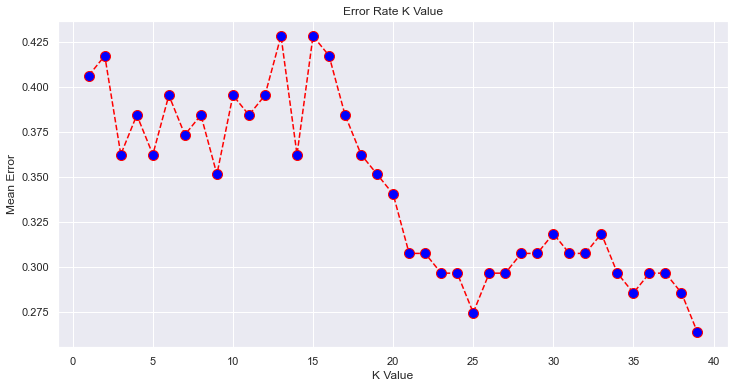

In [174]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(knnX_train, knny_train)
    pred_i = knn.predict(knnX_test)
    error.append(np.mean(pred_i != knny_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [175]:
#Using K=25
knn = KNeighborsClassifier(n_neighbors = 25)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
test_acc = round(knn.score(X_test,Y_test)*100, 2)
print('Acuracy for training data: {}'.format(acc_knn))
print('Accuracy for test data: {}'.format(test_acc))

Acuracy for training data: 65.78
Accuracy for test data: 64.04


### Support Vector Machine

In [176]:
#Support Vector Machine Algorithm
svc = SVC(kernel = 'poly', degree=8)
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
test_svc = round(svc.score(X_test,Y_test)*100, 2)
print('Acuracy for training data: {}'.format(acc_svc))
print('Accuracy for test data: {}'.format(test_svc))

Acuracy for training data: 59.38
Accuracy for test data: 56.14


### Guassian Naive Bayes

In [177]:
#Gaussian
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
test_guassian = round(gaussian.score(X_test, Y_test) * 100, 2)
print('Acuracy for training data: {}'.format(acc_gaussian))
print('Accuracy for test data: {}'.format(test_guassian))

Acuracy for training data: 68.87
Accuracy for test data: 69.3


### Decision Tree

In [178]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
test_decision_tree = round(decision_tree.score(X_test,Y_test)*100, 2)
print('Acuracy for training data: {}'.format(acc_decision_tree))
print('Accuracy for test data: {}'.format(test_decision_tree))

Acuracy for training data: 100.0
Accuracy for test data: 52.63


### Random Forest

In [179]:
#Random Forest
random_forest2 = RandomForestClassifier(n_estimators=100)
random_forest2.fit(X_train, Y_train)
Y_pred = random_forest2.predict(X_test)
random_forest2.score(X_train, Y_train)
acc_random_forest = round(random_forest2.score(X_train, Y_train) * 100, 2)
test_random_forest = round(random_forest2.score(X_test,Y_test)*100, 2)
print('Acuracy for training data: {}'.format(acc_random_forest))
print('Accuracy for test data: {}'.format(test_random_forest))

Acuracy for training data: 100.0
Accuracy for test data: 68.42


In [180]:
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[16  9  1]
 [ 9 37  7]
 [ 1  9 25]]
              precision    recall  f1-score   support

           1       0.62      0.62      0.62        26
           2       0.67      0.70      0.69        53
           3       0.76      0.71      0.74        35

    accuracy                           0.68       114
   macro avg       0.68      0.68      0.68       114
weighted avg       0.69      0.68      0.68       114



## Results when excluding A1
As the models consistently mislabeled A1, I'm taking a look to see if performance is significantly improved when the A1 level is removed.

In [197]:
df = pd.read_csv(r'./data_for_model.csv')

In [198]:
df = df[df.Level > 1]

In [199]:
X = df.drop("Level", axis=1)
Y = df["Level"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

Text(0, 0.5, 'Mean Error')

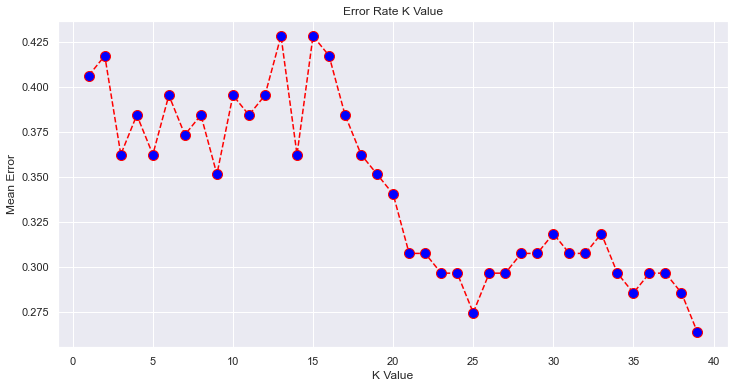

In [208]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(knnX_train, knny_train)
    pred_i = knn.predict(knnX_test)
    error.append(np.mean(pred_i != knny_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [206]:
#Using K=25
knn = KNeighborsClassifier(n_neighbors = 25)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
test_acc = round(knn.score(X_test,Y_test)*100, 2)
print('Acuracy for training data: {}'.format(acc_knn))
print('Accuracy for test data: {}'.format(test_acc))

Acuracy for training data: 47.56
Accuracy for test data: 52.78


In [207]:
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[20  4  2  0  0]
 [ 6 10  5  3  0]
 [ 4  6  9  6  0]
 [ 0  4  4  5  3]
 [ 0  0  1  3 13]]
              precision    recall  f1-score   support

           2       0.67      0.77      0.71        26
           3       0.42      0.42      0.42        24
           4       0.43      0.36      0.39        25
           5       0.29      0.31      0.30        16
           6       0.81      0.76      0.79        17

    accuracy                           0.53       108
   macro avg       0.52      0.52      0.52       108
weighted avg       0.52      0.53      0.52       108



In [203]:
#Support Vector Machine Algorithm
svc = SVC(kernel = 'poly', degree=8)
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
test_svc = round(svc.score(X_test,Y_test)*100, 2)
print('Acuracy for training data: {}'.format(acc_svc))
print('Accuracy for test data: {}'.format(test_svc))

Acuracy for training data: 41.3
Accuracy for test data: 37.96


In [204]:
#Gaussian
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
test_guassian = round(gaussian.score(X_test, Y_test) * 100, 2)
print('Acuracy for training data: {}'.format(acc_gaussian))
print('Accuracy for test data: {}'.format(test_guassian))

Acuracy for training data: 48.26
Accuracy for test data: 48.15


In [205]:
#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
test_decision_tree = round(decision_tree.score(X_test,Y_test)*100, 2)
print('Acuracy for training data: {}'.format(acc_decision_tree))
print('Accuracy for test data: {}'.format(test_decision_tree))

Acuracy for training data: 100.0
Accuracy for test data: 36.11


In [216]:
#Random Forest
random_forest2 = RandomForestClassifier(n_estimators=100)
random_forest2.fit(X_train, Y_train)
Y_pred = random_forest2.predict(X_test)
random_forest2.score(X_train, Y_train)
acc_random_forest = round(random_forest2.score(X_train, Y_train) * 100, 2)
test_random_forest = round(random_forest2.score(X_test,Y_test)*100, 2)
print('Acuracy for training data: {}'.format(acc_random_forest))
print('Accuracy for test data: {}'.format(test_random_forest))

Acuracy for training data: 100.0
Accuracy for test data: 53.7


In [201]:
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[14  8  4  0  0]
 [ 6 13  4  1  0]
 [ 3  8 11  1  2]
 [ 0  3  3  6  4]
 [ 0  0  3  2 12]]
              precision    recall  f1-score   support

           2       0.61      0.54      0.57        26
           3       0.41      0.54      0.46        24
           4       0.44      0.44      0.44        25
           5       0.60      0.38      0.46        16
           6       0.67      0.71      0.69        17

    accuracy                           0.52       108
   macro avg       0.54      0.52      0.52       108
weighted avg       0.53      0.52      0.52       108



### Conclusion

For the 3 test scenarios different algorithms peformed best in each case. Predictably, the most accurate model was built when the texts were treated as just 3 different levels, however I think the most useful model arose from the case with 6 different levels with A1 excluded. Whilst it only predicted the correct level with 53% accuracy its predictions would be within 1 level of error 87% of the time. This kind of accuracy would allow a language learner or teacher to feel confident that the text was appropriate, if potentially a little easy or difficult. The exclusion of the A1 level is no great loss either, as at this level language learners would not be trying to read outside material.

To improve the model I would start by gathering more data and potentially reavaluating the features used, particularly through calculating the ANOVA and Chi-squared for the features if A1 is excluded. 

In [217]:
#Saving Model
import pickle
pickle.dump(knn, open('spanish_level_predictor.pkl','wb'))